In [1]:
%matplotlib inline


# Curve Fitting with Bayesian Ridge Regression


Computes a Bayesian Ridge Regression of Sinusoids.

See `bayesian_ridge_regression` for more information on the regressor.

In general, when fitting a curve with a polynomial by Bayesian ridge
regression, the selection of initial values of
the regularization parameters (alpha, lambda) may be important.
This is because the regularization parameters are determined by an iterative
procedure that depends on initial values.

In this example, the sinusoid is approximated by a polynomial using different
pairs of initial values.

When starting from the default values (alpha_init = 1.90, lambda_init = 1.),
the bias of the resulting curve is large, and the variance is small.
So, lambda_init should be relatively small (1.e-3) so as to reduce the bias.

Also, by evaluating log marginal likelihood (L) of
these models, we can determine which one is better.
It can be concluded that the model with larger L is more likely.


Automatically created module for IPython interactive environment


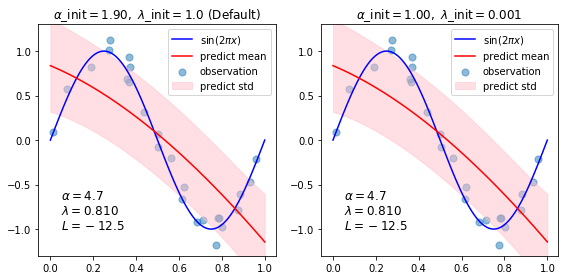

In [9]:
print(__doc__)

# Author: Yoshihiro Uchida <nimbus1after2a1sun7shower@gmail.com>

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import BayesianRidge


def func(x): return np.sin(2*np.pi*x)


# #############################################################################
# Generate sinusoidal data with noise
size = 25
rng = np.random.RandomState(1234)
x_train = rng.uniform(0., 1., size)
y_train = func(x_train) + rng.normal(scale=0.1, size=size)
x_test = np.linspace(0., 1., 100)


# #############################################################################
# Fit by cubic polynomial
n_order = 3
X_train = np.vander(x_train, n_order + 1, increasing=True)
X_test = np.vander(x_test, n_order + 1, increasing=True)

# #############################################################################
# Plot the true and predicted curves with log marginal likelihood (L)
reg = BayesianRidge(tol=1e-6, fit_intercept=False, compute_score=True)
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
for i, ax in enumerate(axes):
    # Bayesian ridge regression with different initial value pairs
    if i == 0:
        init = [1 / np.var(y_train), 1.]  # Default values
    elif i == 1:
        init = [1., 1e-3]
        #reg.set_params(alpha_init=init[0], lambda_init=init[1]) ## the _init parameters are in newer scikit version
    reg.fit(X_train, y_train)
    ymean, ystd = reg.predict(X_test, return_std=True)

    ax.plot(x_test, func(x_test), color="blue", label="sin($2\\pi x$)")
    ax.scatter(x_train, y_train, s=50, alpha=0.5, label="observation")
    ax.plot(x_test, ymean, color="red", label="predict mean")
    ax.fill_between(x_test, ymean-ystd, ymean+ystd,
                    color="pink", alpha=0.5, label="predict std")
    ax.set_ylim(-1.3, 1.3)
    ax.legend()
    title = "$\\alpha$_init$={:.2f},\\ \\lambda$_init$={}$".format(
            init[0], init[1])
    if i == 0:
        title += " (Default)"
    ax.set_title(title, fontsize=12)
    text = "$\\alpha={:.1f}$\n$\\lambda={:.3f}$\n$L={:.1f}$".format(
           reg.alpha_, reg.lambda_, reg.scores_[-1])
    ax.text(0.05, -1.0, text, fontsize=12)

plt.tight_layout()
plt.show()

In [3]:
reg.get_params().keys()


['normalize',
 'n_iter',
 'verbose',
 'lambda_1',
 'lambda_2',
 'fit_intercept',
 'alpha_2',
 'tol',
 'alpha_1',
 'copy_X',
 'compute_score']

In [6]:
import sklearn
sklearn.__version__

'0.20.3'